In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

In [67]:
cwd = os.getcwd()
parent_directory = "R:\\QPIC2022-A7332\\Experiment_Data\\TimeTagger\\TK_015_v3_multimode_sources_ZEP_reflow\\"
data_folder = "09012025_NKT_CW_CAR_Tests_MUX-5-W-076-SW-3\\"
filename = "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-TE0-C31_CH4-TE1-C37_TTUltra_30s_avg_500ps_101_bins_data.txt"

# Load the data into a DataFrame
data = pd.read_csv(parent_directory+data_folder+filename, sep='\t')

# Convert time to seconds for better readability
data['Time differences (s)'] = data['Time differences (ps)'] * 1e-12

# Pulsed CAR 
### Based on https://pubs.aip.org/aip/app/article/6/12/126103/123619/A-silicon-source-of-heralded-single-photons-at-2-m

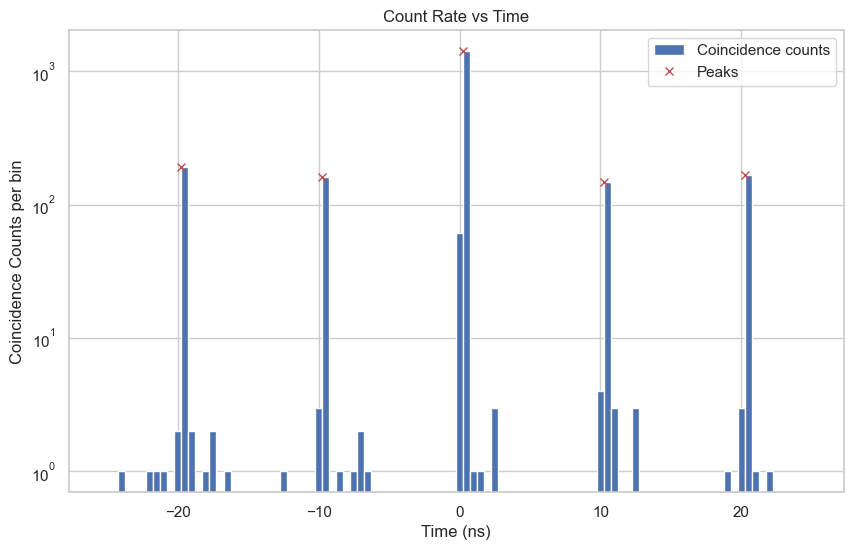

Coincidence counts = 1417 at index 51
Avg Accidental counts = 167.25
Coincidences to Accidental Ratio = 7.472346786248131


In [68]:
sns.set_theme(context='notebook', style="whitegrid", palette='deep')

# Peak finding
peaks, _ = find_peaks(data['Counts per bin'], height=10)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(bins=(data['Time differences (s)']/1e-9), x=(data['Time differences (s)']/1e-9), weights=data['Counts per bin'], label='Coincidence counts', color='b', log=True)
ax.plot((data['Time differences (s)']/1e-9)[peaks], data['Counts per bin'][peaks], "x", color='r', label='Peaks')

# Customize the plot
plt.title('Count Rate vs Time')
plt.xlabel('Time (ns)')
plt.ylabel('Coincidence Counts per bin')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


Ncc = data['Counts per bin'].max()
Ncc_index = data['Counts per bin'].argmax()
print(f"Coincidence counts = {Ncc} at index {Ncc_index}")


Nacc = np.mean(data['Counts per bin'][peaks].drop(index=Ncc_index))
print(f"Avg Accidental counts = {Nacc}")


CAR_pulsed = (Ncc-Nacc)/Nacc
print(f"Coincidences to Accidental Ratio = {CAR_pulsed}")



## Singles Plotting and Average

In [ ]:
cwd = os.getcwd()
parent_directory = "R:\\QPIC2022-A7332\\Experiment_Data\\TimeTagger\\TK_015_v3_multimode_sources_ZEP_reflow\\"
data_folder = "09012025_NKT_CW_CAR_Tests_MUX-5-W-076-SW-3\\"
filename = "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-TE0-C31_CH4-TE1-C37_TTUltra_30s_avg_500ps_101_bins_trace.txt"

# Load the data into a DataFrame
data = pd.read_csv(parent_directory+data_folder+filename, sep='\t')

# Convert time to seconds for better readability
data['Time (s)'] = data['Time (ps)'] * 1e-12


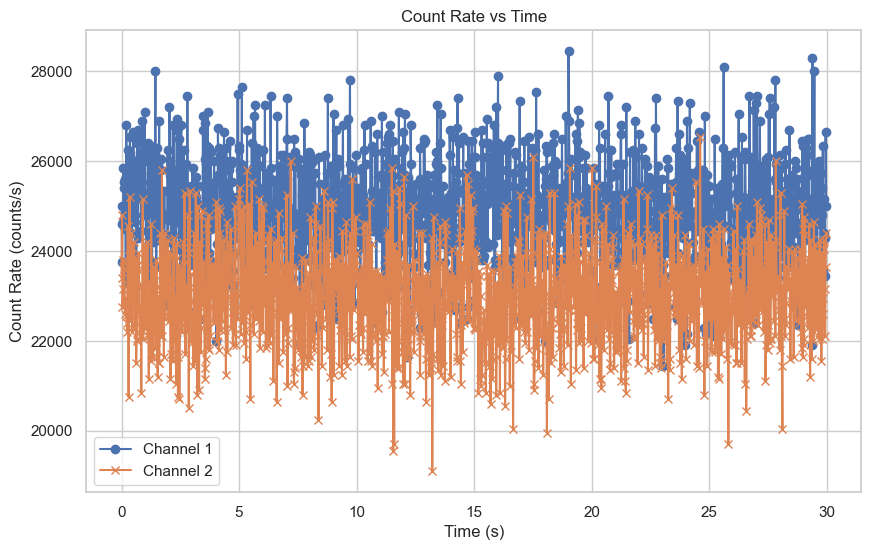

In [ ]:
sns.set_theme(context='notebook', style="whitegrid", palette='deep')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(data['Time (s)'], data['Channel 1 - Count rate (counts/s)'], label='Channel 1', marker='o')
plt.plot(data['Time (s)'], data['Channel 2 - Count rate (counts/s)'], label='Channel 2', marker='x')

# Customize the plot
plt.title('Count Rate vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Count Rate (counts/s)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Loop over all data

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

In [4]:
cwd = os.getcwd()
parent_directory = "R:\\QPIC2022-A7332\\Experiment_Data\\TimeTagger\\TK_015_v3_multimode_sources_ZEP_reflow\\"
data_folder = "09012025_NKT_CW_CAR_Tests_MUX-5-W-076-SW-3\\"
filename = "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-C26_CH4-C42_TTUltra_TE0-pump_TE0_output_30s_avg_500ps_101_bins_data.txt"

# Load the data into a DataFrame
data = pd.read_csv(parent_directory+data_folder+filename, sep='\t')

# Convert time to seconds for better readability
data['Time differences (s)'] = data['Time differences (ps)'] * 1e-12

In [6]:
directory_file_list = os.listdir(parent_directory+data_folder)
print(directory_file_list)

['09012025_MUX-5-W-076-SW-3_12mW_CW_NKT_C34_CH3-C26_CH4-C42_TTUltra_TE0-pump_TE0-output_30s_avg_500ps_101_bins_data.txt', '09012025_MUX-5-W-076-SW-3_12mW_CW_NKT_C34_CH3-C26_CH4-C42_TTUltra_TE0-pump_TE0-output_30s_avg_500ps_101_bins_trace.txt', '09012025_MUX-5-W-076-SW-3_12mW_CW_NKT_C34_CH3-C26_CH4-C42_TTUltra_TE1-pump_TE1-output_30s_avg_500ps_101_bins_data.txt', '09012025_MUX-5-W-076-SW-3_12mW_CW_NKT_C34_CH3-C26_CH4-C42_TTUltra_TE1-pump_TE1-output_30s_avg_500ps_101_bins_trace.txt', '09012025_MUX-5-W-076-SW-3_12mW_CW_NKT_C34_CH3-C31_CH4-C37_TTUltra_TE0-pump_TE0-output_30s_avg_500ps_101_bins_data.txt', '09012025_MUX-5-W-076-SW-3_12mW_CW_NKT_C34_CH3-C31_CH4-C37_TTUltra_TE0-pump_TE0-output_30s_avg_500ps_101_bins_trace.txt', '09012025_MUX-5-W-076-SW-3_12mW_CW_NKT_C34_CH3-C31_CH4-C37_TTUltra_TE1-pump_TE1-output_30s_avg_500ps_101_bins_data.txt', '09012025_MUX-5-W-076-SW-3_12mW_CW_NKT_C34_CH3-C31_CH4-C37_TTUltra_TE1-pump_TE1-output_30s_avg_500ps_101_bins_trace.txt', '09012025_MUX-5-W-076-SW-3_

In [54]:
def import_singles(parent_directory, data_folder, filename):
    singles_data = pd.read_csv(parent_directory+data_folder+filename+"_trace.txt", sep='\t')

    # Convert time to seconds for better readability
    singles_data['Time (s)'] = singles_data['Time (ps)'] * 1e-12
    return singles_data


def plot_singles(data, label):

    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(data['Time (s)'], data['Channel 1 - Count rate (counts/s)'], label='Channel 1', marker='o')
    ax.plot(data['Time (s)'], data['Channel 2 - Count rate (counts/s)'], label='Channel 2', marker='x')

    # Customize the plot
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Count Rate (counts/s)')
    ax.set_title(f'Singles vs Time\n{label}')
    ax.legend()
    ax.grid(True)

    plt.show()


    ch1_avg = data['Channel 1 - Count rate (counts/s)'].mean()
    ch1_std = data['Channel 1 - Count rate (counts/s)'].std()

    ch2_avg = data['Channel 2 - Count rate (counts/s)'].mean()
    ch2_std = data['Channel 2 - Count rate (counts/s)'].std()

    print(f"ch1_avg: {ch1_avg:.2f}+= {ch1_std:.2f} counts/s")
    print(f"ch2_avg: {ch2_avg:.2f}+= {ch2_std:.2f} counts/s") 

    return ax


def import_coincidence(parent_directory, data_folder, filename):
    # Load the data into a DataFrame
    coincidence_data = pd.read_csv(parent_directory+data_folder+filename+"_data.txt", sep='\t')

    # Convert time to seconds for better readability
    coincidence_data['Time differences (s)'] = coincidence_data['Time differences (ps)'] * 1e-12

    return coincidence_data


def plot_coincidence(data, label):
    # Peak finding
    peaks, _ = find_peaks(data['Counts per bin'], height=10)

    # Plot the data
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(bins=(data['Time differences (s)']/1e-9), x=(data['Time differences (s)']/1e-9), weights=data['Counts per bin'], label='Coincidence counts', color='b', log=True)
    ax.plot((data['Time differences (s)']/1e-9)[peaks], data['Counts per bin'][peaks], "x", color='r', label='Peaks')

    # Customize the plot
    plt.title(f'Coincidences vs Time\n{label}')
    plt.xlabel('Time (ns)')
    plt.ylabel('Coincidence Counts per bin')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()


    Ncc = data['Counts per bin'].max()
    Ncc_index = data['Counts per bin'].argmax()
    print(f"Coincidence counts = {Ncc:.2f} at index {Ncc_index}")


    Nacc = np.mean(data['Counts per bin'][peaks].drop(index=Ncc_index))
    print(f"Avg Accidental counts = {Nacc:.2f}")


    CAR_pulsed = (Ncc-Nacc)/Nacc
    print(f"Coincidences to Accidental Ratio = {CAR_pulsed:.2f}")

    return ax


In [48]:
file_list = ["10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-C26_CH4-C42_TTUltra_TE0-pump_TE0_output_30s_avg_500ps_101_bins", 
             "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-C26_CH4-C42_TTUltra_TE1-pump_TE1_output_30s_avg_500ps_101_bins",
             "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-C31_CH4-C37_TTUltra_TE0-pump_TE0_output_30s_avg_500ps_101_bins",
             "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-C31_CH4-C37_TTUltra_TE1-pump_TE1_output_30s_avg_500ps_101_bins",
             "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-TE0-C31_CH4-TE1-C37_TTUltra_30s_avg_500ps_101_bins",
             "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-TE0-C31_CH4-TE1-C37_TTUltra_60s_avg_1ns_200_bins",
             "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-TE0-C31_CH4-TE1-C37_TTUltra_60s_avg_500ps_101_bins",
             "10012025_MUX-5-W-076-SW-3_1mW_Pulsed_NKT_C34_CH3-TE0-C37_CH4-TE1-C31_TTUltra_30s_avg_500ps_101_bins",
             
             ]

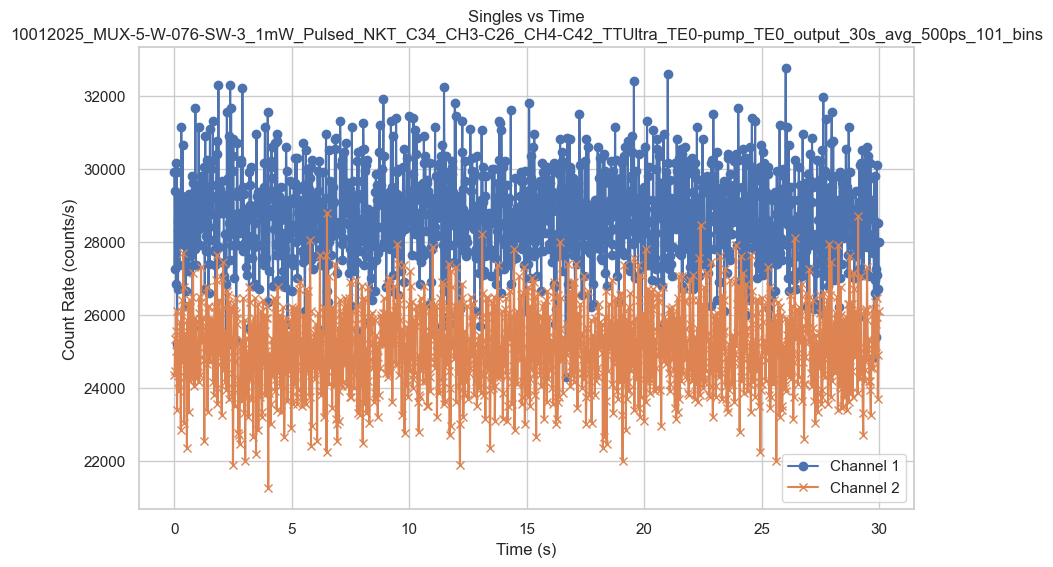

ch1_avg: 28701.30+= 1232.62 counts/s
ch2_avg: 25109.60+= 1101.21 counts/s


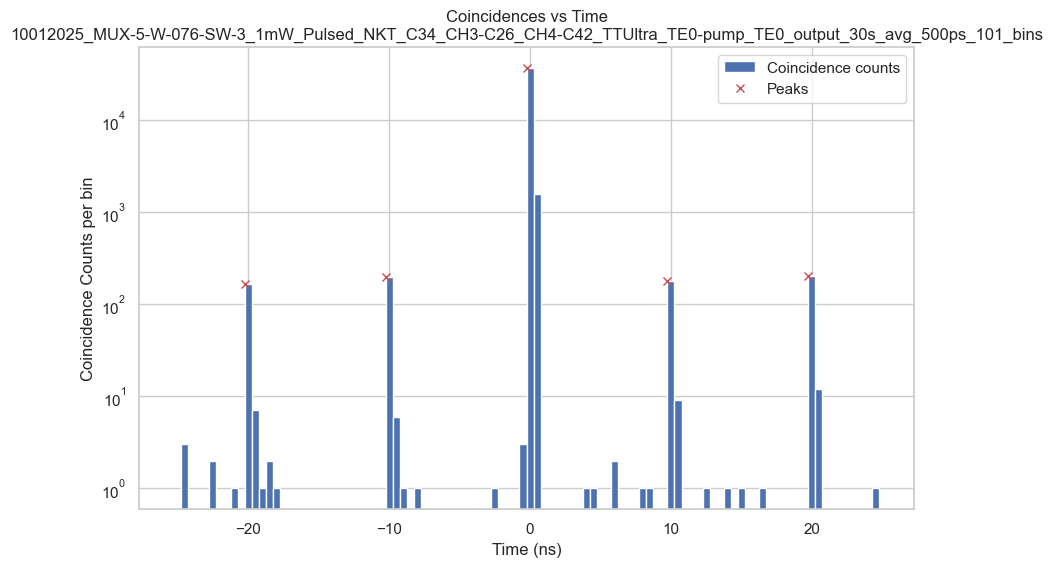

Coincidence counts = 36579.00 at index 50
Avg Accidental counts = 185.00
Coincidences to Accidental Ratio = 196.72


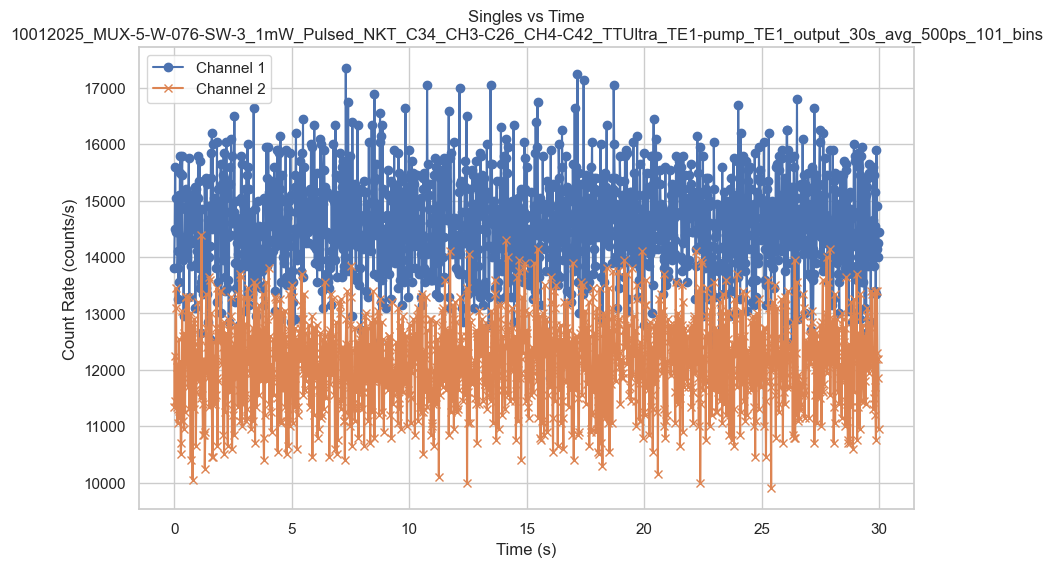

ch1_avg: 14585.57+= 840.99 counts/s
ch2_avg: 12149.57+= 766.42 counts/s


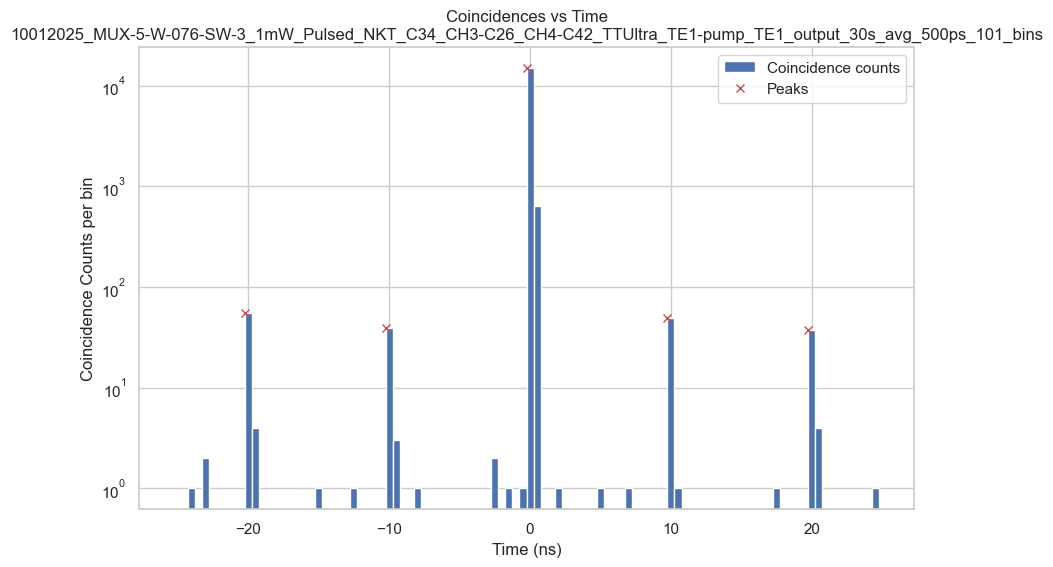

Coincidence counts = 14881.00 at index 50
Avg Accidental counts = 45.00
Coincidences to Accidental Ratio = 329.69


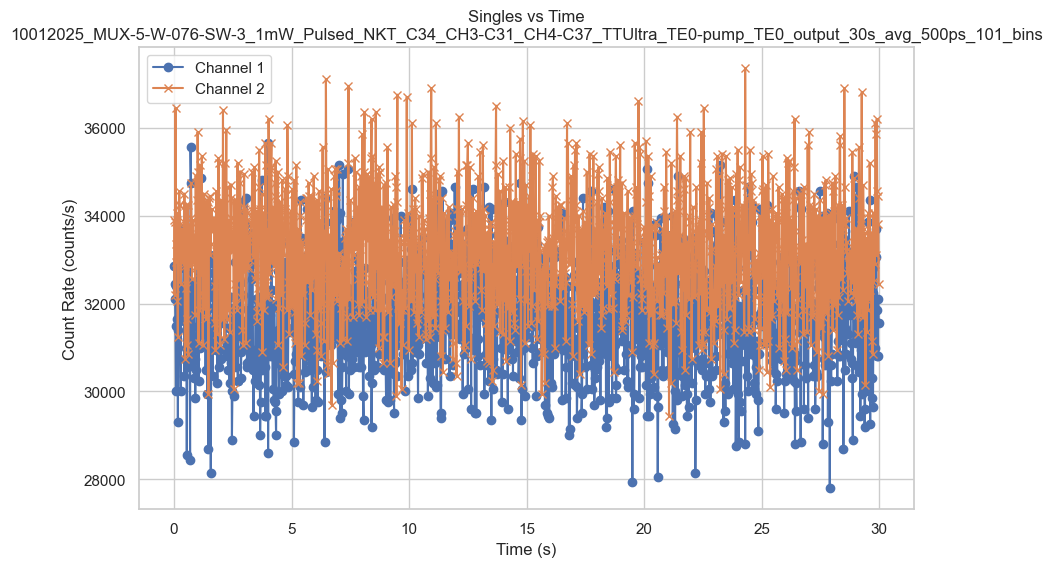

ch1_avg: 31704.17+= 1236.98 counts/s
ch2_avg: 33191.67+= 1301.33 counts/s


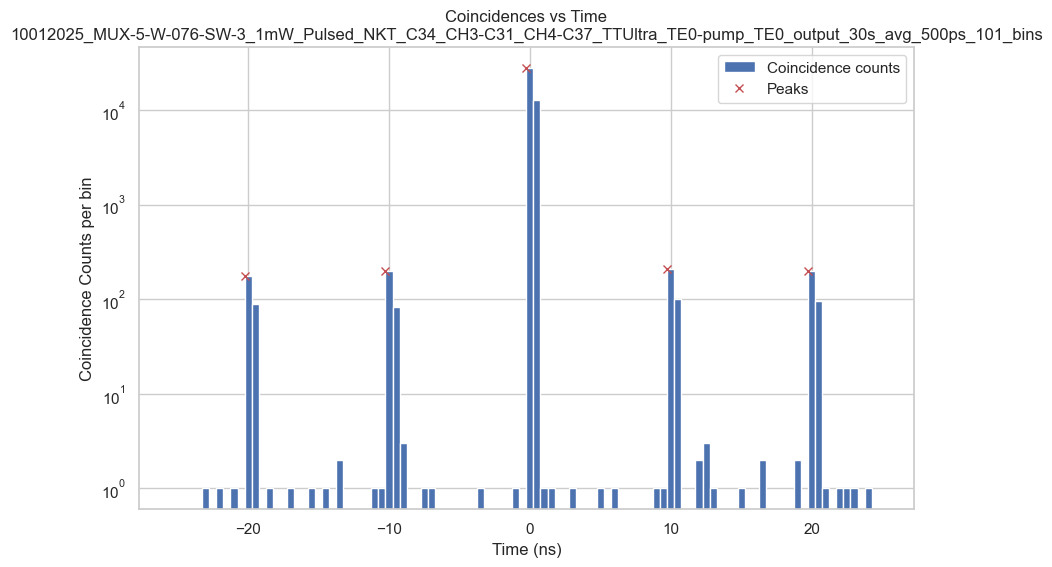

Coincidence counts = 27699.00 at index 50
Avg Accidental counts = 195.25
Coincidences to Accidental Ratio = 140.86


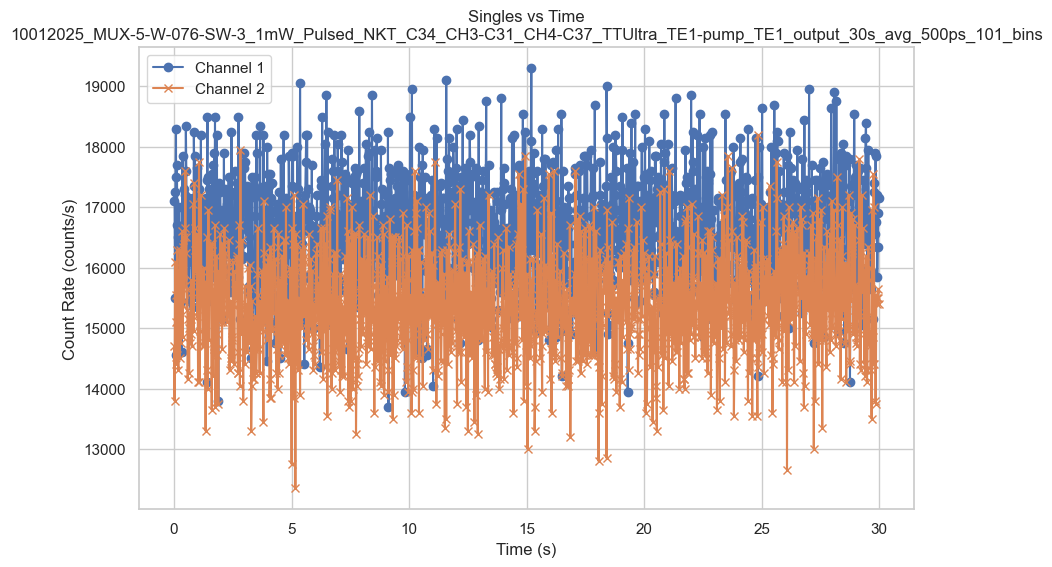

ch1_avg: 16634.90+= 886.72 counts/s
ch2_avg: 15382.73+= 875.41 counts/s


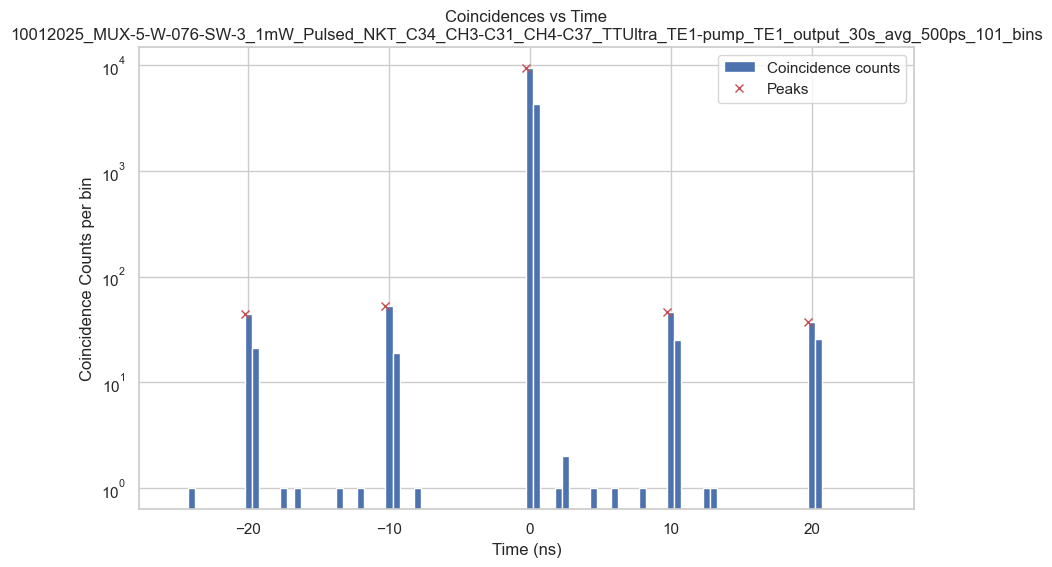

Coincidence counts = 9310.00 at index 50
Avg Accidental counts = 45.00
Coincidences to Accidental Ratio = 205.89


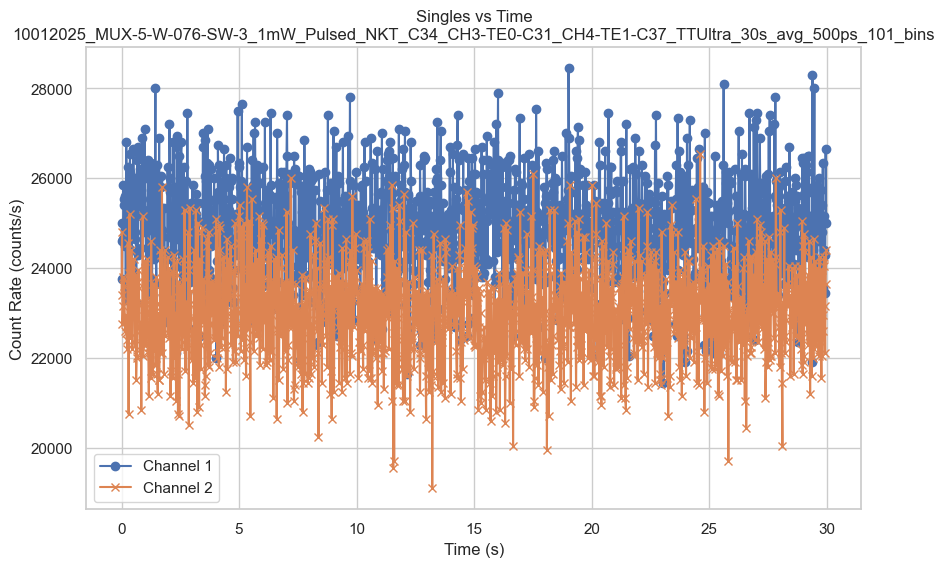

ch1_avg: 24902.43+= 1119.11 counts/s
ch2_avg: 23019.57+= 1061.00 counts/s


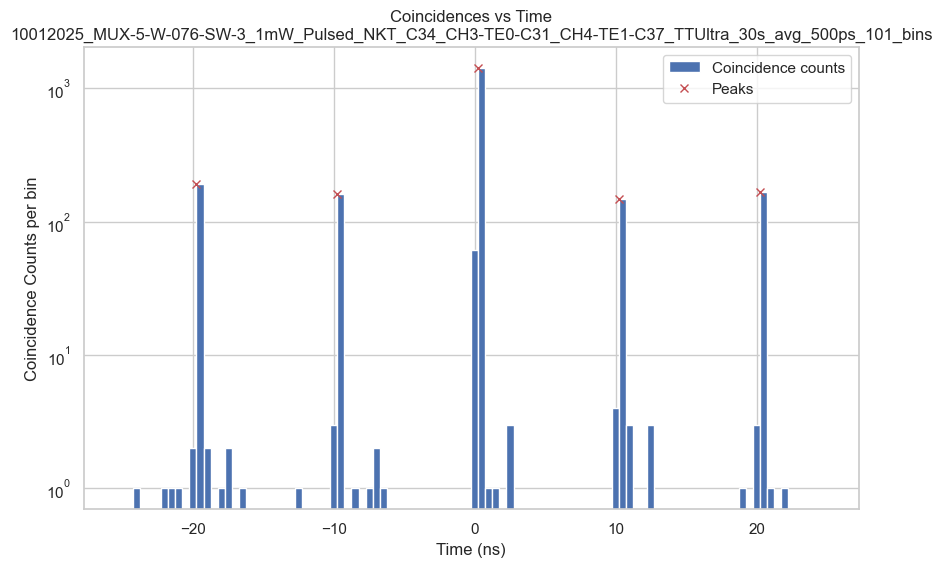

Coincidence counts = 1417.00 at index 51
Avg Accidental counts = 167.25
Coincidences to Accidental Ratio = 7.47


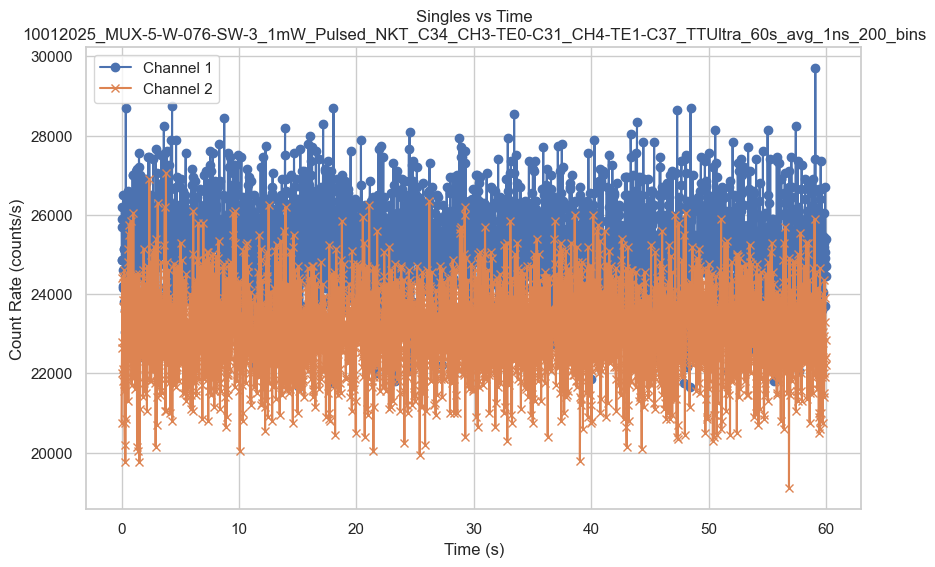

ch1_avg: 25177.30+= 1125.46 counts/s
ch2_avg: 23053.42+= 1088.42 counts/s


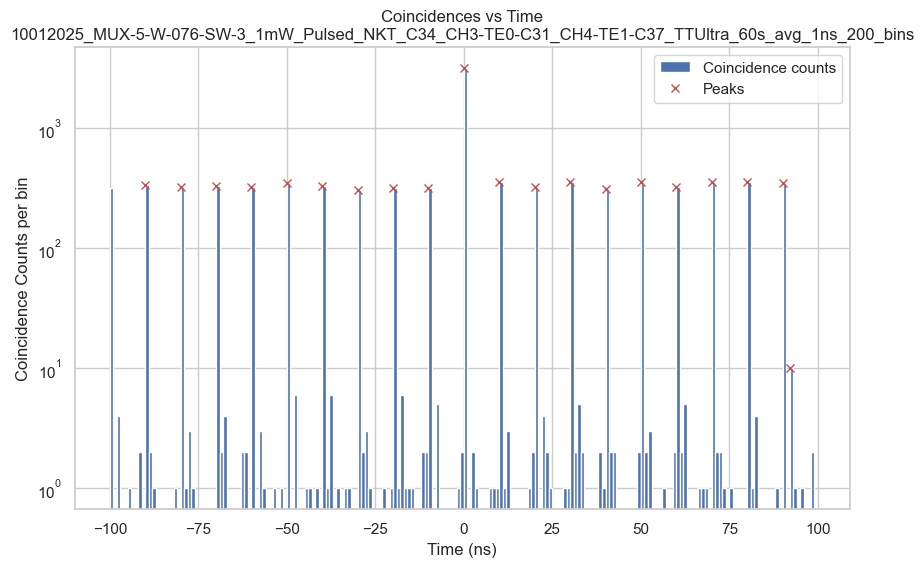

Coincidence counts = 3160.00 at index 100
Avg Accidental counts = 317.42
Coincidences to Accidental Ratio = 8.96


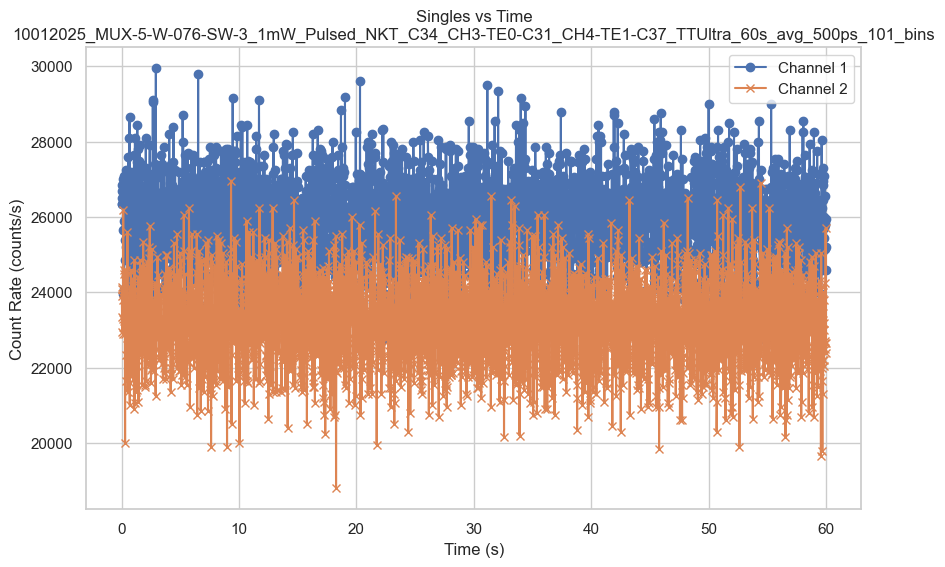

ch1_avg: 25859.10+= 1117.21 counts/s
ch2_avg: 23201.03+= 1118.80 counts/s


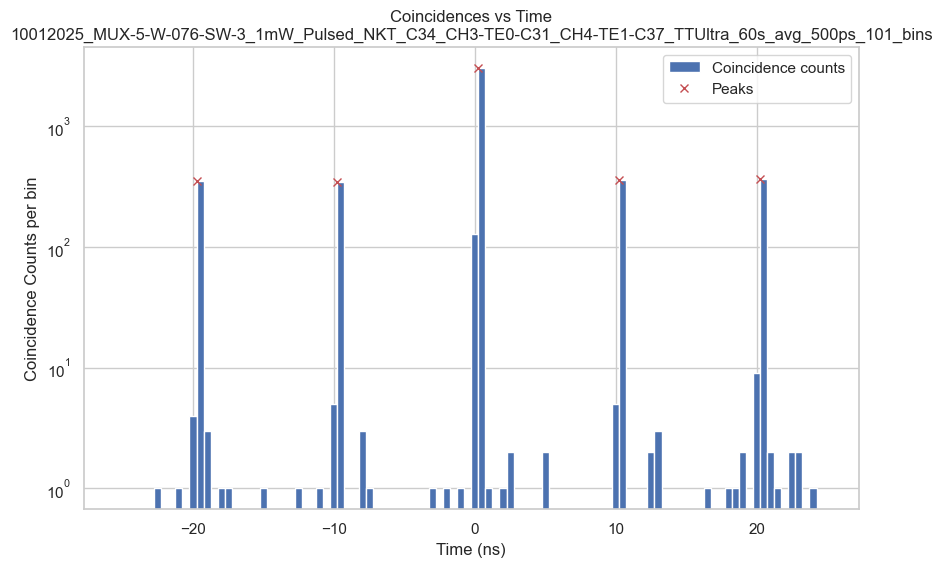

Coincidence counts = 3016.00 at index 51
Avg Accidental counts = 354.25
Coincidences to Accidental Ratio = 7.51


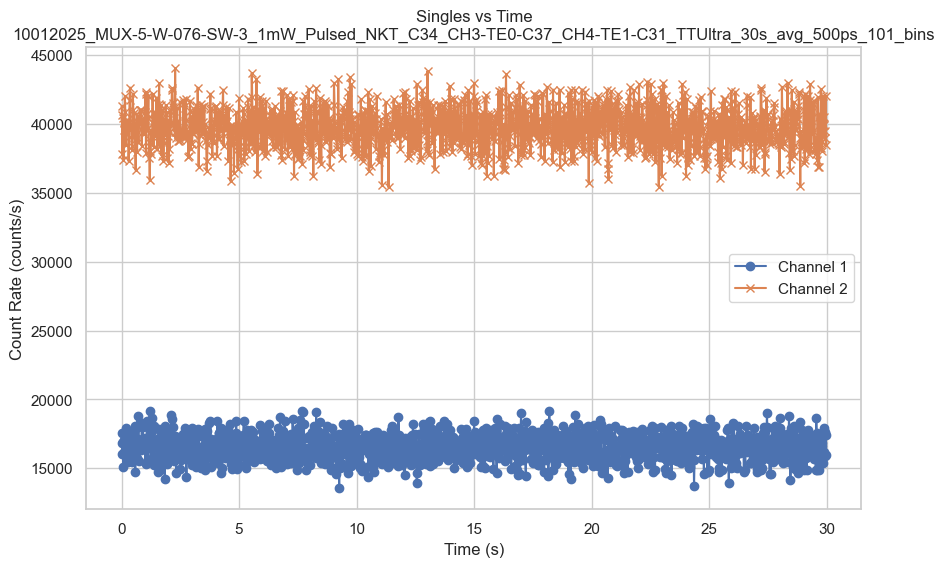

ch1_avg: 16534.17+= 909.90 counts/s
ch2_avg: 39740.27+= 1434.92 counts/s


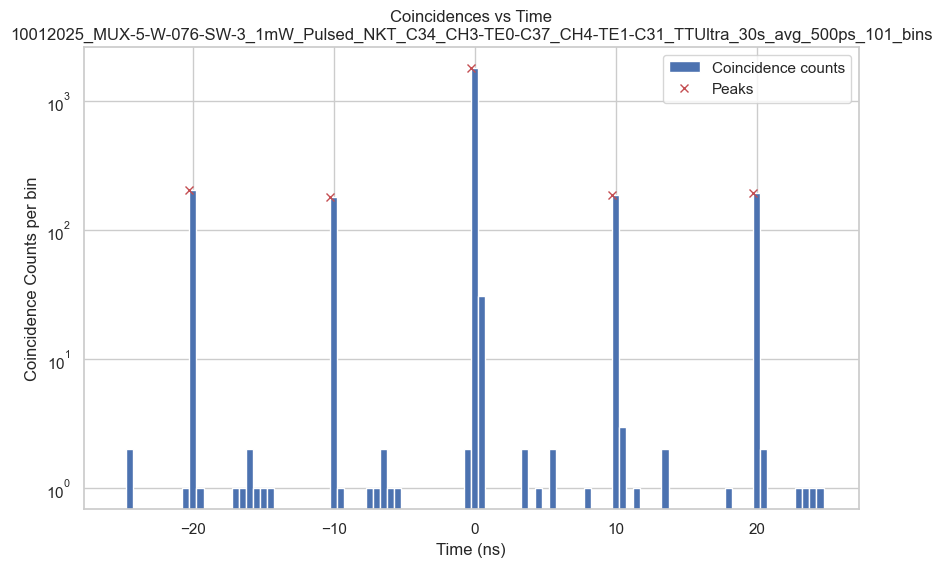

Coincidence counts = 1802.00 at index 50
Avg Accidental counts = 191.75
Coincidences to Accidental Ratio = 8.40


In [55]:

for file in file_list:
    singles_data = import_singles(parent_directory, data_folder, file)
    plot_singles(singles_data, file)

    coincidence_data = import_coincidence(parent_directory, data_folder, file)
    plot_coincidence(coincidence_data, file)
